## Oceanbolt Python SDK - Port Calls in Port Hedland (Timeseries)

Example of Oceanbolt's Python SDK to answer the question - "How many vessels have called Port Hedland in the first six months of 2020 grouped by segment?" 

In [1]:
# Import the relevant libraries
# In order to get a timeseries of port calls, we use the PortCallTimeseries client (https://python-sdk.oceanbolt.com/portcalls_v3/timeseries.html)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.port_calls import PortCallTimeseries
from datetime import date

In [2]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [3]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: PortCallTimeseries
pc_timeseries_client = PortCallTimeseries(base_client)

In [4]:
# We apply filters to our query to get the time series of vessels calling Port Hedland over the first six months of 2020
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/portcalls_v3/timeseries.html#arguments
df = pc_timeseries_client.get(
    frequency="weekly", #we pick weekly freqency
    group_by="segment", #group by vessel segment
    unlocode=['AUPHE'], #Specify the load port's UN/LOCODE. You can include multiple ports to do aggregate analysis. To find the UN/LOCODE of your port of interest, visit https://app.oceanbolt.com/port-tradeflows
    start_date=date(2020, 1, 1),
    end_date=date(2020, 6, 30),
)

#Print 2 first rows of table
df.head(2) 

,group,date,value
0,Capesize,2019-12-30,29.0
1,Capesize,2020-01-06,56.0


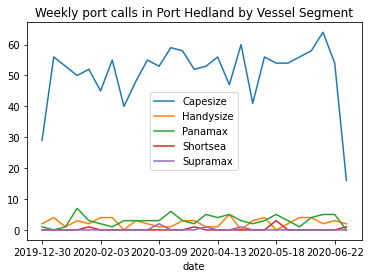

In [5]:
#Let's plot the timeseries
df.set_index('date', inplace=True)
df.groupby('group')['value'].plot(legend=True,title='Weekly port calls in Port Hedland by Vessel Segment');